### The Langevin equation

The Langevin equation, describing the motion of a dust particle in a liquid, is an example of the Ornstein-Uhlenbeck process. Let $X(t)$ - position of a particle at time $t$. The equation looks as below:
$$dX(t) = -aX(t)dt + \sqrt{b}dW(t)$$
where $a, b$ are the constant parameters of the system, $W(t)$ is the Wiener process, which (in practice) is responsible for white noise in the form of collisions with other particles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

One dimension case:

In [2]:
def langevin_emscheme(X_0 = 1.0, a = 0.1, b = 0.5, T = 1.0, n = 100):
    grid = np.linspace(0., T, n+1)
    X = np.zeros(len(grid))
    X[0] = X_0
    for i in range(1, len(grid)):
        dt = grid[i] - grid[i-1]
        dw = np.random.normal() * np.sqrt(dt)
        X[i] = X[i-1] - dt*a + np.sqrt(b)*dw
    return grid, X

Text(0.5, 1.0, 'A simulation of the chosen path vs mean path for 1000 generated one-dimensional paths')

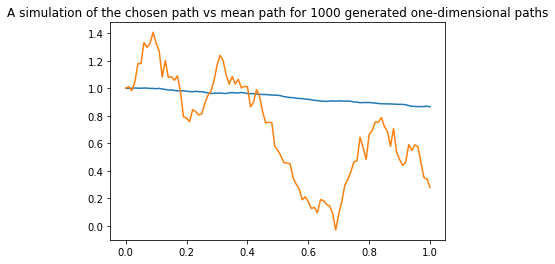

In [3]:
Xs = []
n = 1000
for i in range(n):
    grid, X = langevin_emscheme()
    Xs.append(X)
X = np.average(Xs, axis = 0)
plt.plot(grid, X)
plt.plot(grid, Xs[0])
plt.title(f'A simulation of the chosen path vs mean path for {n} generated one-dimensional paths')

Multidimensional case:

In [4]:
def langevin_emscheme_multidim(X_0, a, b, T = 1.0, n = 100):
    grid = np.linspace(0., T, n+1)
    d = len(X_0)
    mw = b(0., X_0).shape[1]
    X = np.array([np.zeros(d) for i in range(len(grid))])
    X[0] = X_0
    for i in range(1, len(grid)):
        dt = grid[i] - grid[i-1]
        last = X[i - 1]
        dw = np.random.normal(size=mw) * np.sqrt(dt)
        X[i] = last - dt * a(grid[i - 1], last) + np.matmul(np.sqrt(b(grid[i - 1], last)), dw)
    return grid, X

Let's present the generated 2D path of a particle.

In [5]:
def a_m(t, x):
    a = [0.1, 0.25]
    return np.multiply(a, x)

def b_m(t, x):
    return np.transpose(np.array([[0.1, 0.5], [0.3, 0.1]]))

In [6]:
X0_2d = [0., 0.]
T2d = 10.
n2d = 300
grid2d, X2d = langevin_emscheme_multidim(X_0 = X0_2d, a = a_m, b = b_m, T = T2d, n = n2d)

In [7]:
import matplotlib
matplotlib.use('Agg')
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

X = X2d[:,0]
Y = X2d[:,1]

plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for x, y in zip(X, Y):
    plt.scatter(x, y)
    camera.snap()
anim = camera.animate(blit=True)
anim.save('path.gif', writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


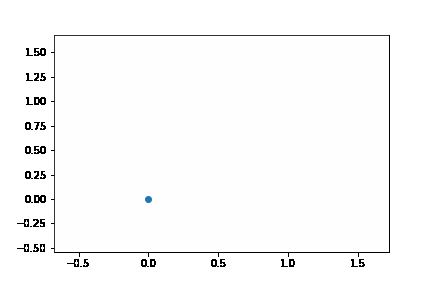

In [8]:
from IPython.display import Image
Image(filename='path.gif')

### HERG's transformation model

The HERG gene makes up the main part of one of the ion channel proteins responsible for removing potassium ions from the heart muscle fibers. Its structure can occur in five different states: three closed states ($C_1, C_2, C_3$), an open state ($O$), and an inactivation state ($I$). The transition from one state to another can take place as shown in the figure below, where $k_1, ..., k_ {10}$ are constants describing the course of the reaction in time.

In [ ]:
from IPython.display import Image
Image(filename='herg.png')

This leads to the following equation:

$d\begin{pmatrix}
X_1\\
X_2\\
X_3\\
X_4\\
X_5
\end{pmatrix}
= \begin{pmatrix}
-1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & -1 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & -1 & -1 & 1 & 0 & 0 & 1 & -1\\
0 & 0 & 0 & 0 & 1 & -1 & -1 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
k_1X_1\\
k_2X_2\\
k_3X_2\\
k_4X_3\\
k_5X_3\\
k_6X_4\\
k_7X_4\\
k_8X_5\\
k_9X_5\\
k_{10}X_3\\
\end{pmatrix}dt
+ g(X)dW(t)
$,


where:


$\scriptsize{g(X) = \begin{pmatrix}
-1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & -1 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & -1 & -1 & 1 & 0 & 0 & 1 & -1\\
0 & 0 & 0 & 0 & 1 & -1 & -1 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
\sqrt{k_1X_1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & \sqrt{k_2X_2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & \sqrt{k_3X_2} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & \sqrt{k_4X_3} & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & \sqrt{k_5X_3} & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & \sqrt{k_6X_4} & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & \sqrt{k_7X_4} & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sqrt{k_8X_5} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sqrt{k_9X_5} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sqrt{k_{10}X_3}\\
\end{pmatrix}}$


$dW(t) = \begin{pmatrix}
dW_1(t)\\
dW_2(t)\\
dW_3(t)\\
dW_4(t)\\
dW_5(t)\\
dW_6(t)\\
dW_7(t)\\
dW_8(t)\\
dW_9(t)\\
dW_{10}(t)\\
\end{pmatrix}$

In [ ]:
k1 = 4.1
k2 = 2.2
k3 = 9.1
k4 = 5.2
k5 = 1.1
k6 = 5.2
k7 = 3.1
k8 = 5.2
k9 = 5.1
k10 = 1.2

k_herg = np.array([k1,k2,k3,k4,k5,k6,k7,k8,k9,k10])

g_herg = np.array(np.mat('-1 1 0 0 0 0 0 0 0 0; 1 -1 -1 1 0 0 0 0 0 0; 0 0 1 -1 -1 1 0 0 1 -1; 0 0 0 0 1 -1 -1 1 0 0; 0 0 0 0 0 0 1 -1 -1 1'))

def langevin_emscheme_herg(X_0, a = 0.1, b = 0.5, k = 0., T = 1.0, n = 100, k2 = 0.):
    grid = np.linspace(0., T, n+1)
    d = len(X_0)
    mw = b(0., X_0, k).shape[1]
    X = np.array([np.zeros(d) for i in range(len(grid))])
    X[0] = X_0
    for i in range(1, len(grid)):
        dt = grid[i] - grid[i-1]
        last = X[i - 1]
        dw = np.random.normal(size=mw) * np.sqrt(dt)
        X[i] = last - dt * a(grid[i - 1], last, k) + np.matmul(b(grid[i - 1], last, k), dw)
    return grid, X

def a_herg(t, x, k):
    kx = np.array([k[0]*x[0], k[1]*x[1], k[2]*x[1], k[3]*x[2], k[4]*x[2], k[5]*x[3], k[6]*x[3], k[7]*x[4], k[8]*x[4], k[9]*x[2]])
    for index, element in enumerate(kx):
        kx[index] = -element
    return np.matmul(g_herg, kx)

def b_herg(t, x, k):
    kx = np.array([k[0]*x[0], k[1]*x[1], k[2]*x[1], k[3]*x[2], k[4]*x[2], k[5]*x[3], k[6]*x[3], k[7]*x[4], k[8]*x[4], k[9]*x[2]])
    for index, element in enumerate(kx):
        kx[index] = np.sqrt(abs(element))
    return np.matmul(g_herg, np.diag(kx))

g_herg

In [ ]:
C1 = 10.
C2 = 20.
C3 = 66.5
O = 23.9
I = 32.2

X0 = np.array([C1, C2, C3, O, I])

In [ ]:
herg_grid, herg_x = langevin_emscheme_herg(X0, a = a_herg, b = b_herg, k = k_herg, T = 5., n = 100)

In [ ]:
for i in range(len(herg_grid)):
    print(herg_x[i, :])

In [ ]:
labels = ['C1', 'C2', 'C3', 'O', 'I']

for i in range(herg_x.shape[1]):
    plt.plot(grid, herg_x[:,i])
    plt.annotate(f'{i}', (grid[0], herg_x[0, i]))
plt.title('HERG states through the time')
plt.show()

The higher values of specific constants, the bigger the expected differences between states at "jump" points.

### Error analysis (TODO)